In [1]:
import json
import pandas as pd

In [2]:
with open(r'D:\EMAT_22110\FB Data Silva\technogecko_20200714\likes.json') as l:
    likes = json.load(l)
likes.keys()

dict_keys(['media_likes', 'comment_likes'])

In [3]:
with open(r'D:\EMAT_22110\liked_posts.json') as k:
    elikes = json.load(k)
elikes.keys()

dict_keys(['likes_media_likes'])

In [4]:
dlikes_df = pd.DataFrame(likes['media_likes'], columns = ['timestamp', 'account'])
dlikes_df.head()

,timestamp,account
0,2020-07-11T04:39:28+00:00,ball_doesnt_lie
1,2020-07-11T04:39:05+00:00,ball_doesnt_lie
2,2020-07-05T17:25:44+00:00,ali_saurusrex
3,2020-07-03T03:40:02+00:00,cacandassociates
4,2020-06-25T17:41:50+00:00,cacandassociates


In [5]:
accounts = [x['title'] for x in elikes['likes_media_likes']]
timestamp = [x['string_list_data'][0]['timestamp'] for x in elikes['likes_media_likes']]
elikes_df = pd.DataFrame({'accounts': accounts, 'timestamp': timestamp})
elikes_df.head()

,accounts,timestamp
0,iss,1423687921
1,iss,1423687906
2,iss,1423687904
3,iss,1423687901
4,smartcarusa,1423687877


In [6]:
count_dlikes = dlikes_df.groupby('account').count()
count_dlikes.head()

,timestamp
account,
a_matt_silva,18
ali_saurusrex,68
andrewtcurry,1
aroseroar16,29
athenalemon,1


In [7]:
count_elikes = elikes_df.groupby('accounts').count()
count_elikes.head()

,timestamp
accounts,
4hairfashion,24
4hairpleasure,28
5ideasaday,2
9gag,1
__brandonhudson__,1


In [8]:
import random

In [9]:
rand_dlikes = random.sample(list(count_dlikes.index), 10)
rand_dlikes

['silva_c097',
 'wrenchscienceusa',
 'johnnydhampton',
 'jsevier',
 'poorlydrawnlines',
 'melissarohwer',
 'holly.berry_22',
 'favoritedekruyfonthecitadel',
 'miles_sari',
 'reams_esq']

In [10]:
rand_elikes = random.sample(list(count_elikes.index), 10)
rand_elikes

['apple',
 'e.v.a.n.t',
 'yankodesign',
 'joe_zeren',
 'thenextweb',
 'kgro363',
 'intechtoday',
 'rhodesaaron',
 'verge',
 'mdonze8']

In [11]:
sample_dlikes = count_dlikes.loc[rand_dlikes]
sample_dlikes

,timestamp
account,
silva_c097,3
wrenchscienceusa,1
johnnydhampton,1
jsevier,1
poorlydrawnlines,2
melissarohwer,1
holly.berry_22,1
favoritedekruyfonthecitadel,4
miles_sari,3


In [12]:
sample_elikes = count_elikes.loc[rand_elikes]
sample_elikes

,timestamp
accounts,
apple,1
e.v.a.n.t,1
yankodesign,1
joe_zeren,1
thenextweb,57
kgro363,1
intechtoday,3
rhodesaaron,25
verge,307


In [13]:
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np

#### Example of a Chi-Squared test
${\chi}^2=\sum \frac{(O_i - E_i)^2}{E_i}\$

![Chi-Squared Distribution Table](https://cnx.org/resources/70b81d7114bff2b3a9f023cef867195d86d9d1b9/chisquare.PNG)

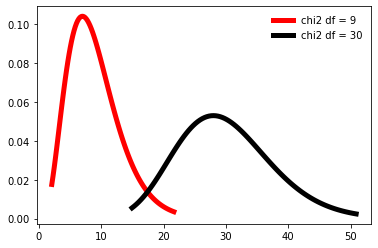

In [14]:
fig, ax1 = plt.subplots(1,1)
df1 = 9
x1 = np.linspace(stats.chi2.ppf(0.01, df1), stats.chi2.ppf(0.99, df1), 100)
ax1.plot(x1, stats.chi2.pdf(x1, df1), 'r-', lw = 5, label = 'chi2 df = 9')
df2 = 30
x2 = np.linspace(stats.chi2.ppf(0.01, df2), stats.chi2.ppf(0.99, df2), 100)
ax1.plot(x2, stats.chi2.pdf(x2, df2), 'k-', lw = 5, label = 'chi2 df = 30')
ax1.legend(loc = 'best', frameon = False)
plt.show()

In [15]:
sample_dlikes['timestamp'].sum()

33

In [16]:
sample_dlikes['timestamp'].mean()

3.3

In [17]:
stats.chisquare(sample_dlikes['timestamp'])

Power_divergenceResult(statistic=57.60606060606061, pvalue=3.867913521405649e-09)

In [18]:
stats.chisquare(sample_dlikes['timestamp'], f_exp=[sample_dlikes['timestamp'].mean()] * 10)

Power_divergenceResult(statistic=57.60606060606061, pvalue=3.867913521405649e-09)

In [19]:
stats.chisquare(sample_dlikes['timestamp'], f_exp=sample_dlikes['timestamp'])

Power_divergenceResult(statistic=0.0, pvalue=1.0)

In [20]:
sample_elikes['timestamp'].sum()

398

In [21]:
sample_elikes['timestamp'].mean()

39.8

In [22]:
stats.chisquare(sample_elikes['timestamp'])

Power_divergenceResult(statistic=2067.778894472362, pvalue=0.0)

In [23]:
stats.chisquare(sample_elikes['timestamp'], f_exp=[sample_elikes['timestamp'].mean()] * 10)

Power_divergenceResult(statistic=2067.778894472362, pvalue=0.0)

In [24]:
stats.chisquare(sample_elikes['timestamp'], f_exp=sample_elikes['timestamp'])

Power_divergenceResult(statistic=0.0, pvalue=1.0)

#### Example of correlation


In [25]:
daccount_name_lengths = [len(x) for x in count_dlikes.index]
count_dlikes['name_length'] = daccount_name_lengths
count_dlikes.head()

,timestamp,name_length
account,,
a_matt_silva,18,12
ali_saurusrex,68,13
andrewtcurry,1,12
aroseroar16,29,11
athenalemon,1,11


In [26]:
eaccount_name_lengths = [len(x) for x in count_elikes.index]
count_elikes['name_length'] = eaccount_name_lengths
count_elikes.head()

,timestamp,name_length
accounts,,
4hairfashion,24,12
4hairpleasure,28,13
5ideasaday,2,10
9gag,1,4
__brandonhudson__,1,17


In [27]:
stats.pearsonr(count_dlikes['timestamp'], count_dlikes['name_length'])

(-0.024879569424235394, 0.854246015476617)

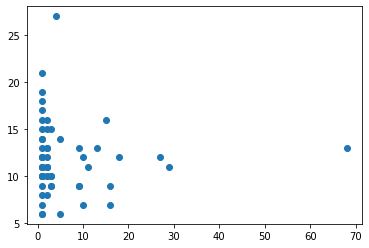

In [28]:
plt.scatter(count_dlikes['timestamp'], count_dlikes['name_length'])

In [29]:
stats.pearsonr(count_elikes['timestamp'], count_elikes['name_length'])

(-0.21782783019294166, 0.00025261707382898005)

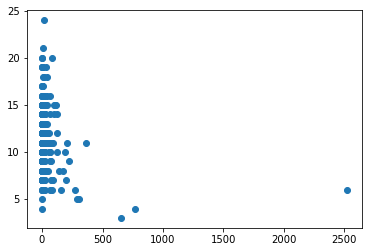

In [30]:
plt.scatter(count_elikes['timestamp'], count_elikes['name_length'])